In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from tempfile import TemporaryFile
import csv
import numpy as np
from skimage.transform import resize
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [0]:
X = np.load('/content/gdrive/My Drive/data_4_levels_balanced_32_32_3.npy') 
Y = np.load('/content/gdrive/My Drive/labels_4_levels_balanced.npy')

In [0]:
print(X.shape)
print(X)

(6254, 32, 32, 3)
[[[[191. 199. 184.]
   [193. 199. 185.]
   [196. 200. 186.]
   ...
   [209. 205. 196.]
   [211. 208. 199.]
   [210. 210. 200.]]

  [[192. 198. 184.]
   [193. 199. 185.]
   [196. 200. 186.]
   ...
   [206. 202. 193.]
   [205. 202. 193.]
   [203. 203. 193.]]

  [[194. 198. 184.]
   [195. 197. 184.]
   [196. 198. 185.]
   ...
   [208. 204. 195.]
   [204. 201. 192.]
   [203. 200. 191.]]

  ...

  [[157. 154. 145.]
   [158. 155. 146.]
   [149. 146. 137.]
   ...
   [172. 172. 162.]
   [164. 166. 155.]
   [168. 170. 159.]]

  [[165. 165. 157.]
   [167. 167. 159.]
   [161. 161. 153.]
   ...
   [172. 172. 164.]
   [164. 165. 157.]
   [167. 170. 161.]]

  [[162. 165. 158.]
   [142. 145. 138.]
   [137. 138. 132.]
   ...
   [172. 172. 164.]
   [164. 165. 157.]
   [165. 171. 161.]]]


 [[[205. 209. 195.]
   [205. 209. 195.]
   [206. 208. 195.]
   ...
   [209. 213. 199.]
   [205. 211. 197.]
   [203. 209. 195.]]

  [[205. 209. 195.]
   [205. 209. 195.]
   [207. 209. 196.]
   ...
   

In [0]:
print(Y.shape)
print(Y)

(6254, 4)
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [0]:
from sklearn.utils import shuffle
X, Y = shuffle(X, Y, random_state=0)

In [0]:
x_train = X[:5254]
y_train = Y[:5254]
print(x_train.shape)
print(y_train.shape)

(5254, 32, 32, 3)
(5254, 4)


In [0]:
x_val = X[5254:5754]
y_val = Y[5254:5754]
print(x_val.shape)
print(y_val.shape)

(500, 32, 32, 3)
(500, 4)


In [0]:
x_test = X[5754:]
y_test = Y[5754:]
print(x_test.shape)
print(y_test.shape)

(500, 32, 32, 3)
(500, 4)


(32, 32, 3)


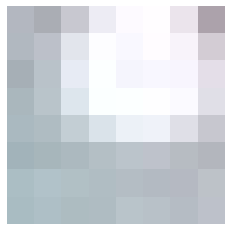

[0. 1. 0. 0.]


In [0]:
# picking a test sample before generating adversarial examples 
Image = X[ 2, :]
print( Image.shape )
r,g,b = cv2.split(Image)       # get b,g,r
Image = cv2.merge([r,g,b])

plt.imshow( Image.astype('uint8') )
plt.axis( 'off' )
plt.show( )
print(Y[2])

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [0]:
import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output=output)

for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

"""
restnet.trainable = True
set_trainable = False
for layer in restnet.layers:
    if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in restnet.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

restnet.summary()
"""

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 3s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fl...)`
  import sys


"\nrestnet.trainable = True\nset_trainable = False\nfor layer in restnet.layers:\n    if layer.name in ['res5c_branch2b', 'res5c_branch2c', 'activation_97']:\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False\nlayers = [(layer, layer.name, layer.trainable) for layer in restnet.layers]\npd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])\n\nrestnet.summary()\n"

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.regularizers import l2
model_Sigmoid = Sequential()
model_Sigmoid.add(restnet)
model_Sigmoid.add(Dense(512, activation='relu', input_dim=(32,32,3), kernel_regularizer=l2(0.001)))
model_Sigmoid.add(Dropout(0.2))
model_Sigmoid.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_Sigmoid.add(Dropout(0.2))
model_Sigmoid.add(Dense(4, activation='sigmoid'))
model_Sigmoid.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model_Sigmoid.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 24,901,508
Trainable params: 1,313,796
Non-trainable params: 23,587,712
__________________________________

In [0]:
# RMSprop ###(lr = 0.001 -> [23.6N, 30.59N, 24.4N])Overfitting###(lr = 0.0001 -> [28.79N, 26.8N, 25.99N])Overfitting###(lr = 0.00001 -> [34.79N, 25.6N, 38.6N])Overfitting###
# Adam ###(lr = 0.001 -> [23.99N, 31.99N, 33.59N])Overfitting###(lr = 0.0001 -> [32.19N, 29.39N, 28.99NOG])Overfitting###(lr = 0.00001 -> [27.2N, 26.8NOG, 26.6N])Overfitting###
# SGD ###(lr = 0.001 -> [29.19NOG, 42.39N, 24.6N])Overfitting###(lr = 0.0001 -> [25.79N, 30.0NOG, 0.25N])###(lr = 0.00001 -> [24.4N, 34.2N, 20.99N])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#SGD lr = 0.001         ### 34.4% (SGD, lr = 0.001, f1 = 0.316053) ###

model_Sigmoid.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 5254 samples, validate on 500 samples
Epoch 1/10
5254/5254 [==============================] - 11s 2ms/step - loss: 2.8260 - accuracy: 0.2859 - val_loss: 2.7235 - val_accuracy: 0.3300
Epoch 2/10
5254/5254 [==============================] - 2s 290us/step - loss: 2.6915 - accuracy: 0.3298 - val_loss: 2.6603 - val_accuracy: 0.3460
Epoch 3/10
5254/5254 [==============================] - 2s 290us/step - loss: 2.6431 - accuracy: 0.3725 - val_loss: 2.6304 - val_accuracy: 0.3440
Epoch 4/10
5254/5254 [==============================] - 2s 288us/step - loss: 2.5998 - accuracy: 0.4204 - val_loss: 2.6078 - val_accuracy: 0.3560
Epoch 5/10
5254/5254 [==============================] - 2s 287us/step - loss: 2.5559 - accuracy: 0.4612 - val_loss: 2.5966 - val_accuracy: 0.3500
Epoch 6/10
5254/5254 [==============================] - 2s 289us/step - loss: 2.5133 - accuracy: 0.4720 - val_loss: 2.5903 - val_accuracy: 0.3640
Epoch 7/10
5254/5254 [==============================] - 1s 285us/step - loss: 

In [0]:
model_Sigmoid.evaluate(x_test, y_test)

500/500 [==============================] - 0s 942us/step


[2.666978744506836, 0.3440000116825104]

In [0]:
# predict probabilities for test set
yhat_probs_Sigmoid = model_Sigmoid.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Sigmoid = model_Sigmoid.predict_classes(x_test, verbose=0)
yhat_probs_Sigmoid = np.argmax(yhat_probs_Sigmoid, axis=1)
print(yhat_probs_Sigmoid.shape)
print(yhat_classes_Sigmoid.shape)

(500,)
(500,)


In [0]:
print(y_test.shape)
y_test_Sigmoid = np.argmax(y_test, axis=1)
print(y_test_Sigmoid.shape)

(500, 4)
(500,)


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Sigmoid = accuracy_score(y_test_Sigmoid, yhat_classes_Sigmoid)
print('Accuracy Sigmoid: %f' % accuracy_Sigmoid)
# precision tp / (tp + fp)
precision_Sigmoid = precision_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Precision Sigmoid: %f' % precision_Sigmoid)
# recall: tp / (tp + fn)
recall_Sigmoid = recall_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('Recall Sigmoid: %f' % recall_Sigmoid)
# f1: 2 tp / (2 tp + fp + fn)
f1_Sigmoid = f1_score(y_test_Sigmoid, yhat_classes_Sigmoid, average='macro')
print('F1 score Sigmoid: %f' % f1_Sigmoid)

Accuracy Sigmoid: 0.344000
Precision Sigmoid: 0.516419
Recall Sigmoid: 0.372587
F1 score Sigmoid: 0.316053


In [0]:
model_Softmax = Sequential()
model_Softmax.add(restnet)
model_Softmax.add(Dense(512, activation='relu', input_dim=(32,32,3), kernel_regularizer=l2(0.001)))
model_Softmax.add(Dropout(0.2))
model_Softmax.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model_Softmax.add(Dropout(0.2))
model_Softmax.add(Dense(4, activation='softmax'))
model_Softmax.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00001),
              metrics=['accuracy'])
model_Softmax.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 2048)              23587712  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2052      
Total params: 24,901,508
Trainable params: 1,313,796
Non-trainable params: 23,587,712
__________________________________

In [0]:
# RMSprop ###(lr = 0.001 -> [26.6N, 31.79N, 25.6N])Overfitting###(lr = 0.0001 -> [27.79N, 29.39N, 24.19N])Overfitting###(lr = 0.00001 -> [23.39N, 36.39OG, 32.8N])Overfitting###
# Adam ###(lr = 0.001 -> [25.79N, 27.0N, 38.19N])###(lr = 0.0001 -> [35.19N, 34.79N, 28.79N])Overfitting###(lr = 0.00001 -> [23.8N, 39.39NOG, 35.8NOG])Overfitting###
# SGD ###(lr = 0.001 -> [26.39N, 38.19N, 34.79NOG])Overfitting###(lr = 0.0001 -> [33.59NOG, 34.99N, 32.4NOG])###(lr = 0.00001 -> [17.0NOG, 26.6N, 21.99N])###
# N = No learning, GG = Great Learning, OG = Okay Learning, U = Unlearning

#Adam lr = 0.00001          ### 35.6% (Adam, lr = 0.00001, f1 = 0.299213) ###

model_Softmax.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Train on 5254 samples, validate on 500 samples
Epoch 1/10
5254/5254 [==============================] - 4s 779us/step - loss: 2.9945 - accuracy: 0.2941 - val_loss: 2.8439 - val_accuracy: 0.2200
Epoch 2/10
5254/5254 [==============================] - 2s 297us/step - loss: 2.7330 - accuracy: 0.3932 - val_loss: 2.8171 - val_accuracy: 0.2480
Epoch 3/10
5254/5254 [==============================] - 2s 295us/step - loss: 2.5571 - accuracy: 0.4777 - val_loss: 2.8022 - val_accuracy: 0.2860
Epoch 4/10
5254/5254 [==============================] - 2s 295us/step - loss: 2.4682 - accuracy: 0.5207 - val_loss: 2.8199 - val_accuracy: 0.2880
Epoch 5/10
5254/5254 [==============================] - 2s 294us/step - loss: 2.3732 - accuracy: 0.5634 - val_loss: 2.8769 - val_accuracy: 0.3120
Epoch 6/10
5254/5254 [==============================] - 2s 295us/step - loss: 2.2889 - accuracy: 0.5923 - val_loss: 2.8731 - val_accuracy: 0.3460
Epoch 7/10
5254/5254 [==============================] - 2s 294us/step - loss:

In [0]:
model_Softmax.evaluate(x_test, y_test)

500/500 [==============================] - 0s 514us/step


[2.9304359130859376, 0.35600000619888306]

In [0]:
# predict probabilities for test set
yhat_probs_Softmax = model_Softmax.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes_Softmax = model_Softmax.predict_classes(x_test, verbose=0)
yhat_probs_Softmax = np.argmax(yhat_probs_Softmax, axis=1)
print(yhat_probs_Softmax.shape)
print(yhat_classes_Softmax.shape)

(500,)
(500,)


In [0]:
print(y_test.shape)
y_test_Softmax = np.argmax(y_test, axis=1)
print(y_test_Softmax.shape)

(500, 4)
(500,)


In [0]:
# accuracy: (tp + tn) / (p + n)
accuracy_Softmax = accuracy_score(y_test_Softmax, yhat_classes_Softmax)
print('Accuracy Softmax: %f' % accuracy_Softmax)
# precision tp / (tp + fp)
precision_Softmax = precision_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Precision Softmax: %f' % precision_Softmax)
# recall: tp / (tp + fn)
recall_Softmax = recall_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('Recall Softmax: %f' % recall_Softmax)
# f1: 2 tp / (2 tp + fp + fn)
f1_Softmax = f1_score(y_test_Softmax, yhat_classes_Softmax, average='macro')
print('F1 score Softmax: %f' % f1_Softmax)

Accuracy Softmax: 0.356000
Precision Softmax: 0.457949
Recall Softmax: 0.367462
F1 score Softmax: 0.299213
